<a href="https://colab.research.google.com/github/sauravkumar19/Hotel_booking_data_analysis/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

##We are using the following libraries:
- Numpy: We will use numpy arrays as they are comparitively faster than lists, also columns of dataframes behaves as numpy arrays

- Pandas: for reading the data from csv file, for data clening and for preparing data for analysis

- matplotlib,seabors: for different visualisations, for drawing conclusions from data and for exploratory data analysis. 

In [ ]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#DATA DESCRIPTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/My Drive/AlmaBetter_Capstone_projects/Capstone_project1_eda/Hotel Bookings.csv"
hotels_original=pd.read_csv(path)
hotels=hotels_original.copy()

In [ ]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotels.describe(include = ['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [ ]:
hotels["reservation_status"].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

#DATA CLEANING

In [ ]:
#to print the percentage of null values in each column
null_percent=pd.Series()
for col in hotels.columns:
  null_percent[col]=((hotels.shape[0]-hotels[col].count())/(hotels.shape[0]))*100
print(null_percent)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
#removing duplicate values
hotels.drop_duplicates(inplace=True)

In [ ]:
#preserving columns having at least 10% of not null values
hotels.dropna(axis=1,inplace=True,thresh=(0.1*hotels.shape[0]))

#preserving rows having at least 20% of not null values
hotels.dropna(axis=0,inplace=True,thresh=(0.2*hotels.shape[1]))

#the column named company will get deleted from the dataset

In [ ]:
# replacing Nan value from chidren and agent columns with 0
hotels['children'].fillna(0, inplace = True)
hotels['agent'].fillna(0, inplace = True)

In [ ]:
# replacing Nan value of country column with mode value
hotels['country'].fillna('other', inplace = True)

In [ ]:
null_percentage = (hotels.isnull().sum()/len(hotels))*100
null_percentage

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [ ]:
hotels.shape

(87396, 31)

#EDA

#Naman garg

In [ ]:
# PI chart for Country
# Bar graph For Months
# Bar graph chart for market_segment
# reserved_room_type


# megha

#saurav

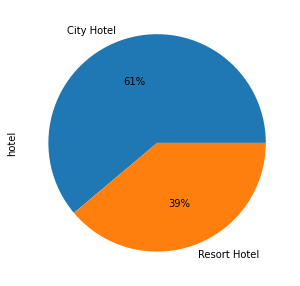

In [ ]:
# which type of hotel book more
hotel_type = hotels['hotel'].value_counts()
hotel_type.plot(kind = 'pie',figsize = (5,5),autopct='%1.0f%%')

**INFERENCE:**
Tourist prefer generally city hotel, rather than resort hotel.

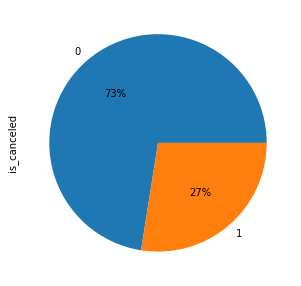

In [ ]:
# canceling hotel booking
hotel_type = hotels['is_canceled'].value_counts()
hotel_type.plot(kind = 'pie',figsize = (5,5),autopct='%1.0f%%')

**INFERENCE:**
About 27% reservation in hotels is cancel after booking.

Text(0.5, 1.0, 'cancel_percentage')

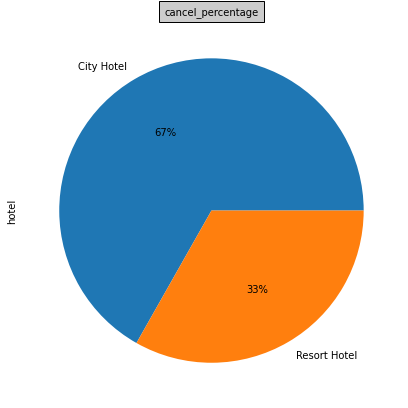

In [ ]:
#try to convert whole senerio into bargraph
canceled_hotel = hotels.loc[hotels['is_canceled'] == 1, 'hotel'].value_counts()
canceled_hotel.plot(kind = 'pie',figsize = (7,7),autopct='%1.0f%%')
plt.title('cancel_percentage',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 10)

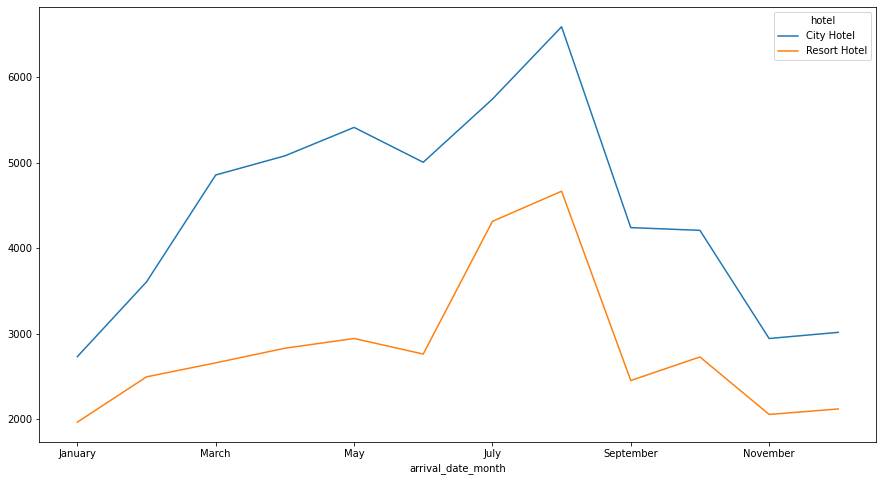

In [ ]:
#In which month, hotel booking is maximum and minimum 
arrival_months = pd.crosstab(hotels['arrival_date_month'],hotels['hotel'])
arrival_months = arrival_months.reindex(['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
arrival_months.plot(kind = 'line', y = ['City Hotel','Resort Hotel'], figsize=(15,8))

INFERENCE: 


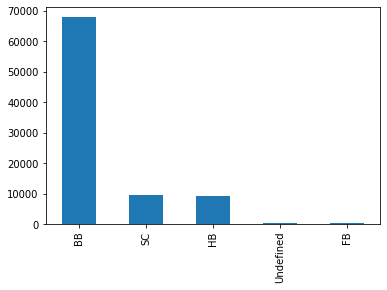

In [ ]:
hotels['meal'].unique()
hotels['meal'].value_counts().plot(kind = 'bar')


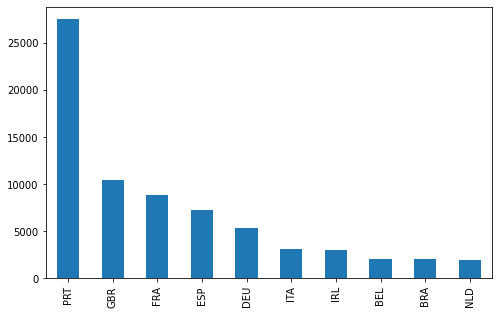

In [ ]:
hotels['country'].unique()
max_country = hotels['country'].value_counts().sort_values(ascending = False).head(10)
max_country.plot(kind = 'bar',figsize = (8,5))

In [ ]:
segment_cancel=pd.crosstab(hotels["market_segment"],hotels["is_canceled"])
segment_cancel['total_booking_per'] = segment_cancel[0]+segment_cancel[1]
segment_cancel[0] = round((segment_cancel[0]/segment_cancel['total_booking_per'])*100,2)
segment_cancel[1] = round((segment_cancel[1]/segment_cancel['total_booking_per'])*100,2)
segment_cancel

is_canceled,0,1,total_booking_per
market_segment,,,
Aviation,80.18,19.82,227
Complementary,87.46,12.54,702
Corporate,87.89,12.11,4212
Direct,85.28,14.72,11804
Groups,72.99,27.01,4942
Offline TA/TO,85.15,14.85,13889
Online TA,64.65,35.35,51618
Undefined,0.00,100.00,2


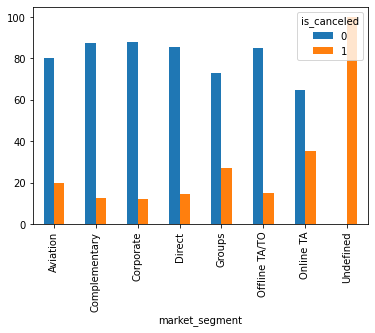

In [ ]:
segment_cancel.plot(kind = 'bar',y = [0,1])

In [ ]:
hotel_adr = hotels.groupby('hotel')['adr'].mean()

Text(0.5, 0, 'Hotel')

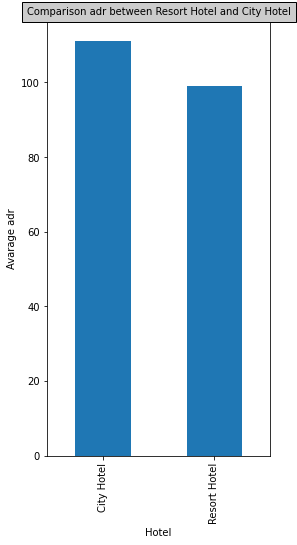

In [ ]:
hotel_adr.plot(kind = 'bar',figsize =(4,8))
plt.title('Comparison adr between Resort Hotel and City Hotel',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 10)
plt.ylabel('Avarage adr')
plt.xlabel('Hotel')

**INFERENCE:**

City Hotel generates more revenue than resort hotel

In [ ]:
monthly_adr =hotels.groupby(['arrival_date_month','hotel'])['adr'].mean().unstack()
monthly_adr = monthly_adr.reindex(['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
monthly_adr

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,85.092612,49.131584
February,88.945304,54.081107
March,94.763375,57.569213
April,117.156250,79.283805
May,127.851240,80.551101
June,123.836342,112.340141
July,120.055385,156.166914
August,124.901601,187.566659
September,118.546566,100.892331


In [ ]:
monthly_adr['percentage_diff'] = round((abs(monthly_adr['City Hotel'] - monthly_adr['Resort Hotel'])/(monthly_adr['City Hotel'] + monthly_adr['Resort Hotel']))*100,2)
monthly_adr

hotel,City Hotel,Resort Hotel,percentage_diff
arrival_date_month,,,
January,85.092612,49.131584,26.79
February,88.945304,54.081107,24.38
March,94.763375,57.569213,24.42
April,117.156250,79.283805,19.28
May,127.851240,80.551101,22.70
June,123.836342,112.340141,4.87
July,120.055385,156.166914,13.07
August,124.901601,187.566659,20.05
September,118.546566,100.892331,8.05


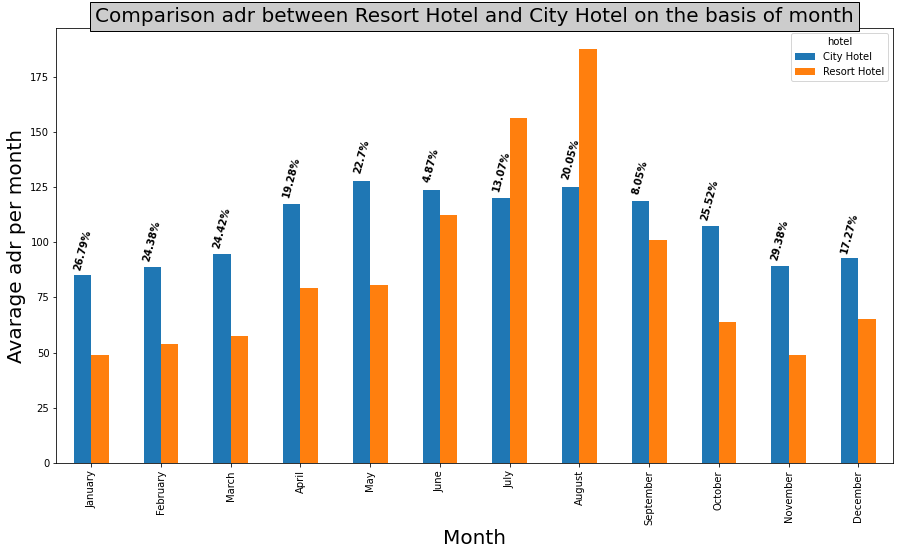

In [ ]:
monthly_adr_graph = monthly_adr.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'], figsize =(15,8))
plt.title('Comparison adr between Resort Hotel and City Hotel on the basis of month',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('Avarage adr per month',fontsize = 20)
plt.xlabel('Month',fontsize = 20)

i = 0
for p in monthly_adr_graph.patches[0:12]:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, y+height*1.03,str(monthly_adr.percentage_diff[i])+'%',ha='center',weight='bold',rotation=75)
  i+=1
plt.show()


**INFERENCE:**



In [ ]:
hotels['market_segment'].unique()


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
market_segment_adr = hotels.groupby('market_segment')['adr'].mean()
market_segment_adr

market_segment
Aviation         100.170396
Complementary      3.049245
Corporate         68.151246
Direct           116.579429
Groups            74.864284
Offline TA/TO     81.764191
Online TA        118.171606
Undefined         15.000000
Name: adr, dtype: float64

Text(0, 0.5, 'ADR')

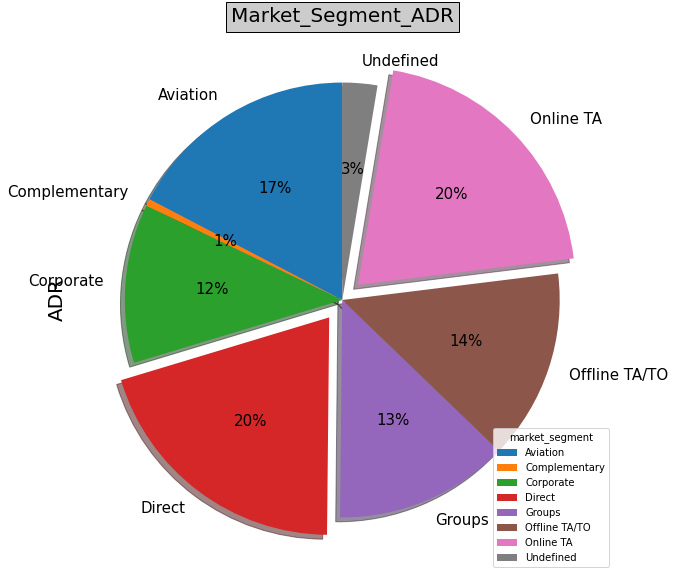

In [ ]:
explode = [0,0,0,0.1,0,0,0.1,0]
market_segment_adr.plot(kind = 'pie', y = 'market_segment', autopct='%1.0f%%', figsize =(15,10),explode = explode, shadow = True,startangle = 90, fontsize = 15)
plt.legend(title ='market_segment',loc ='lower right')
plt.title('Market_Segment_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

In [ ]:
hotels['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
distribution_channel_adr = hotels.groupby('distribution_channel')['adr'].mean()
distribution_channel_adr

distribution_channel
Corporate     68.515682
Direct       109.133604
GDS          120.317845
TA/TO        108.559116
Undefined     46.240000
Name: adr, dtype: float64

Text(0, 0.5, 'ADR')

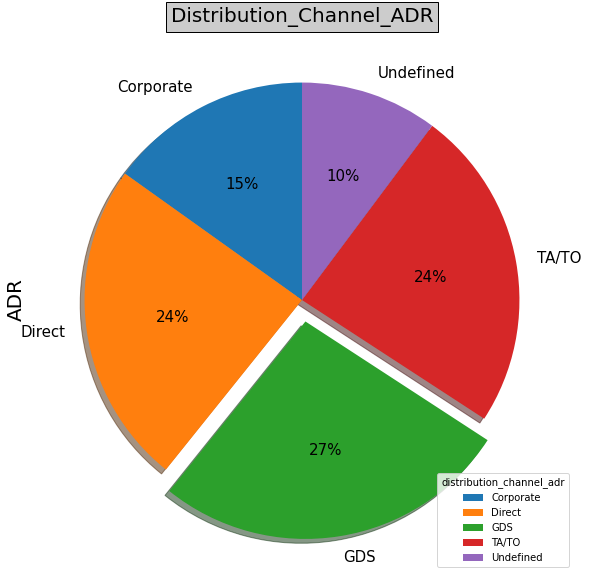

In [ ]:
expolde_1 = [0,0,0.1,0,0]
distribution_channel_adr.plot(kind = 'pie', y = 'distribution_channel', autopct='%1.0f%%', figsize =(15,10),explode = expolde_1, shadow = True,startangle = 90,fontsize = 15)
plt.legend(title ='distribution_channel_adr',loc ='lower right')
plt.title('Distribution_Channel_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

In [ ]:
hotels['total_guest'] = hotels['adults'] + hotels['children']
hotels['day_stay'] =hotels['stays_in_weekend_nights'] + hotels['stays_in_week_nights']

In [ ]:
guest_number = hotels.loc[hotels['total_guest'] <= 5,['adr','total_guest']]
guest_wise_adr = guest_number.groupby('total_guest')['adr'].mean()

Text(0.5, 0, 'Number_of_guest')

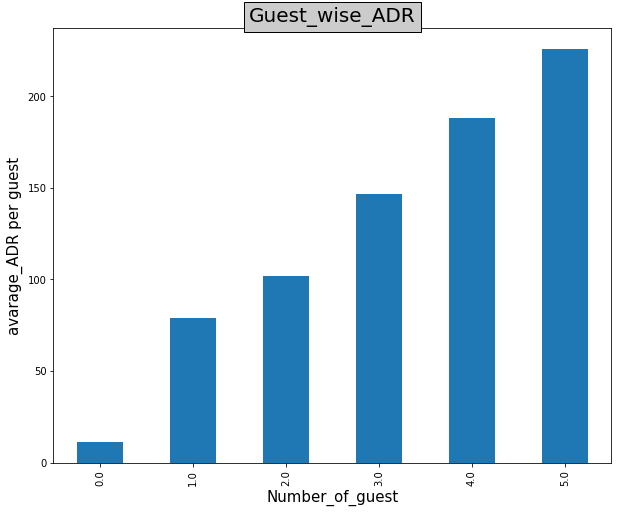

In [ ]:
guest_wise_adr.plot(kind = 'bar',figsize = (10,8))
plt.title('Guest_wise_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('avarage_ADR per guest', fontsize = 15)
plt.xlabel('Number_of_guest',fontsize = 15)

In [ ]:
#outliers - Consider the number of guest greater than 5 as outliers as there adr is 0
hotels.loc[hotels['total_guest'] > 5,['adr','total_guest','hotel']]


,adr,total_guest,hotel
328,133.16,12.0,Resort Hotel
1539,0.00,40.0,Resort Hotel
1587,0.00,26.0,Resort Hotel
1643,0.00,50.0,Resort Hotel
1752,0.00,26.0,Resort Hotel
1884,0.00,26.0,Resort Hotel
1917,0.00,27.0,Resort Hotel
1962,0.00,27.0,Resort Hotel
2003,0.00,26.0,Resort Hotel
2164,0.00,26.0,Resort Hotel


In [ ]:
Hotels_stay = hotels.groupby(['day_stay','hotel'])['day_stay'].count().unstack()
Hotels_stay.fillna(0, inplace = True)
Hotels_stay.head()

hotel,City Hotel,Resort Hotel
day_stay,,
0,288.0,363.0
1,10284.0,6900.0
2,10824.0,4921.0
3,13552.0,4287.0
4,9620.0,3955.0


Text(0, 0.5, 'ADR')

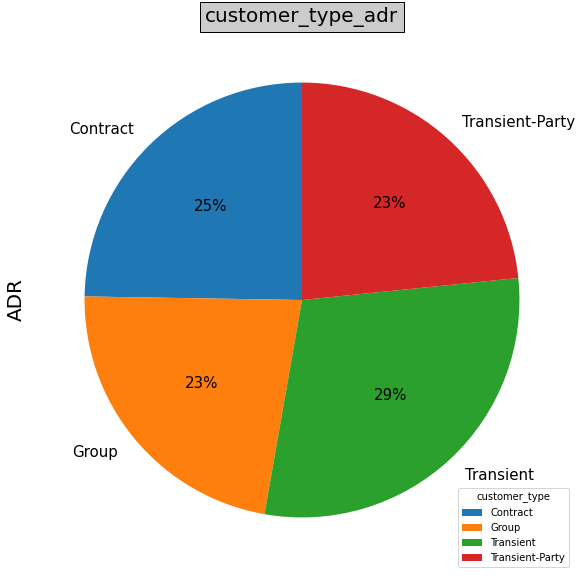

In [ ]:
customer_type_adr = hotels.groupby('customer_type')['adr'].mean()
customer_type_adr.plot(kind = 'pie', y = 'customer_type', autopct='%1.0f%%', figsize =(15,10),explode = None,startangle = 90,fontsize = 15)
plt.legend(title ='customer_type',loc ='lower right')
plt.title('customer_type_adr',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

In [ ]:
# retention = hotels.loc[hotels['is_repeated_guest'] == 1]
retention_market_segment = pd.crosstab(hotels['market_segment'],hotels['is_repeated_guest'])
retention_market_segment['retention_rate'] = round((retention_market_segment[1]/(retention_market_segment[0]+retention_market_segment[1])*100),2)
retention_market_segment

is_repeated_guest,0,1,retention_rate
market_segment,,,
Aviation,164,63,27.75
Complementary,478,224,31.91
Corporate,2767,1445,34.31
Direct,11026,778,6.59
Groups,4885,57,1.15
Offline TA/TO,13620,269,1.94
Online TA,51039,579,1.12
Undefined,2,0,0.00


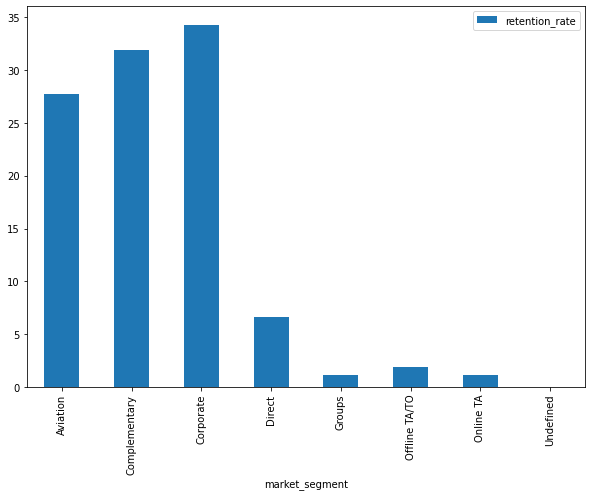

In [ ]:
retention_market_segment.plot(kind = 'bar', y = 'retention_rate', figsize = (10,7))

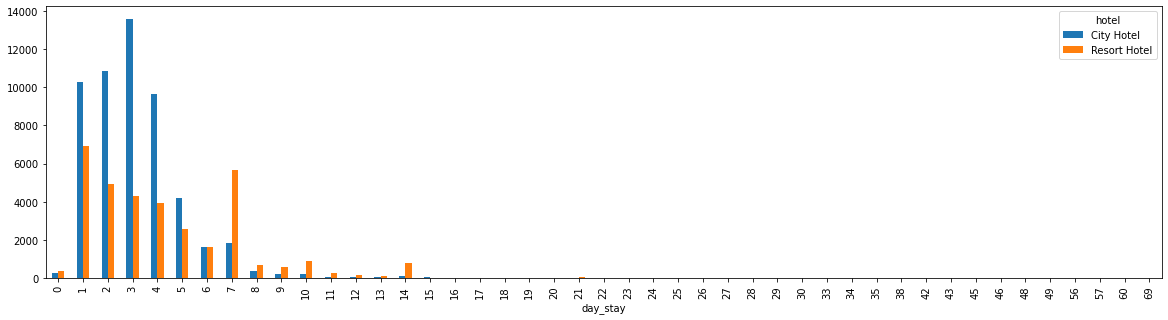

In [ ]:
Hotels_stay.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'],figsize =(20,5))

#gauri

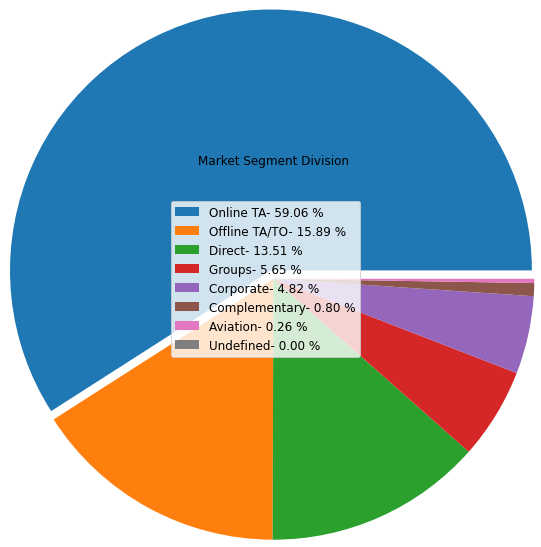

In [ ]:
#most useful market segment
def make_pieplot(data,explode):
  req_data=dict(data.value_counts())
  marketing_options_names=np.array(list(req_data.keys()))
  marketing_options_values=np.array(list(req_data.values()))
  #print(marketing_options_values)
  percent=((marketing_options_values)/marketing_options_values.sum())*100.
  patches,texts=plt.pie(marketing_options_values,rotatelabels=True,radius= 3,explode=explode)
  plt.title("Market Segment Division")
  labels = ['{0}- {1:1.2f} %'.format(i,j) for i,j in zip(marketing_options_names, percent)]
  plt.legend(patches, labels, loc='center left',  fontsize=12)
make_pieplot(hotels["market_segment"],[0.1,0,0,0,0,0,0,0])

In [ ]:
# to judge which agent is better 
segment_cancelled=pd.crosstab(hotels["is_canceled"],hotels["market_segment"])
segment_cancelled_percentage=segment_cancelled.copy()

In [ ]:
segment_cancelled

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,182,614,3702,10067,3607,11826,33373,0
1,45,88,510,1737,1335,2063,18245,2


In [ ]:
data=dict(hotels["market_segment"].value_counts())

In [ ]:
for i in list(data.keys()):
  segment_cancelled_percentage[i][0]=(segment_cancelled[i][0]/data[i])*100
  segment_cancelled_percentage[i][1]=(segment_cancelled[i][1]/data[i])*100

In [ ]:
segment_cancelled_percentage

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,80,87,87,85,72,85,64,0
1,19,12,12,14,27,14,35,100


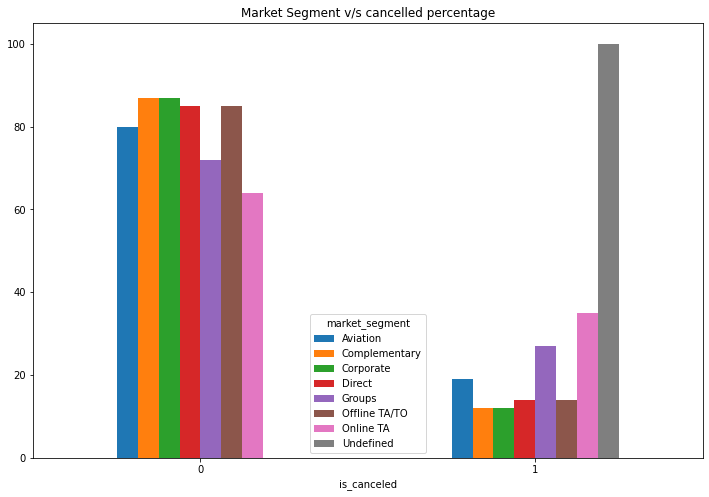

In [ ]:

segment_cancelled_percentage.plot(kind="bar", figsize=(12,8),title="Market Segment v/s cancelled percentage", rot=0,)

In [ ]:
segment_month=pd.crosstab(hotels["arrival_date_month"],hotels["market_segment"])
segment_month=pd.DataFrame(segment_month,index= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )

In [ ]:
segment_month.columns

Index(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA', 'Undefined'],
      dtype='object', name='market_segment')

In [ ]:
#segment_month

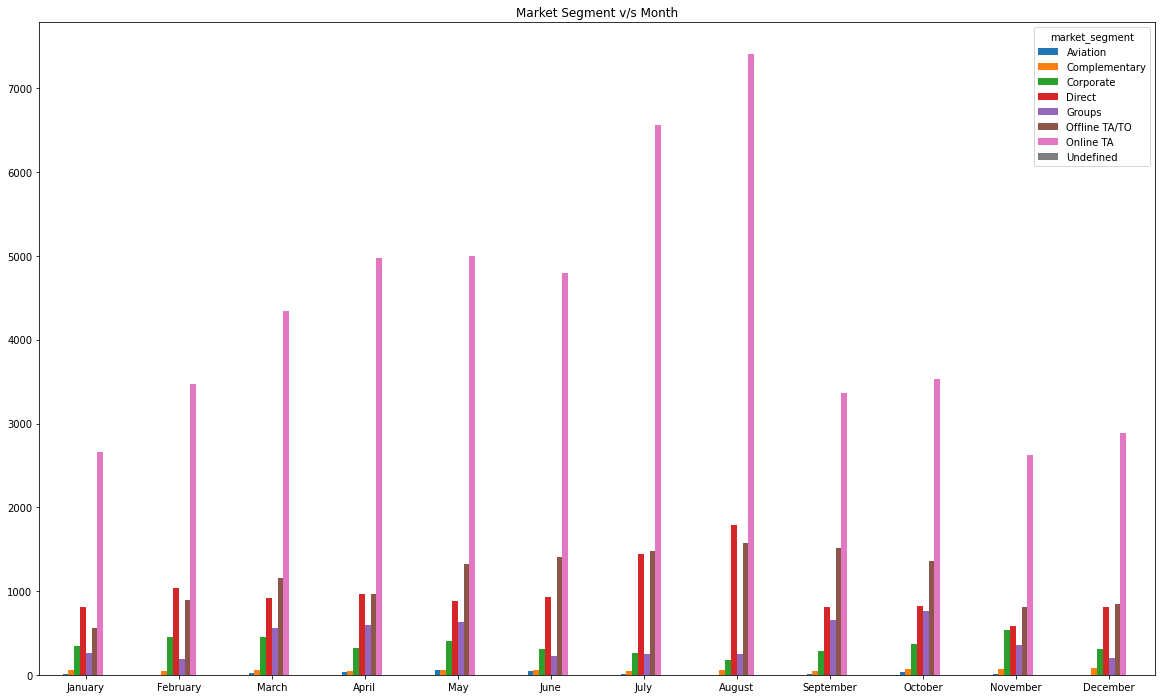

In [ ]:
#ax=plt.figure(figsize=(8,6),facecolor='grey',edgecolor='orange')
segment_month.plot(kind="bar", figsize=(20,12),title="Market Segment v/s Month", rot=0)

In [ ]:
segment_year=pd.crosstab(hotels["arrival_date_year"],hotels["market_segment"])
segment_year

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
arrival_date_year,,,,,,,,
2015,0,152,844,2146,1344,3121,5704,2
2016,121,349,2132,5326,2041,7080,25342,0
2017,106,201,1236,4332,1557,3688,20572,0


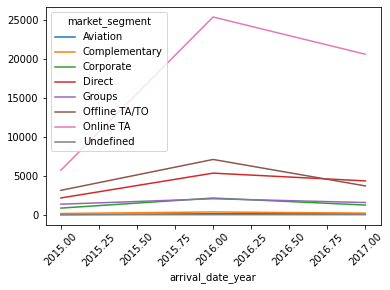

In [ ]:
segment_year.plot(kind="line",rot=45)


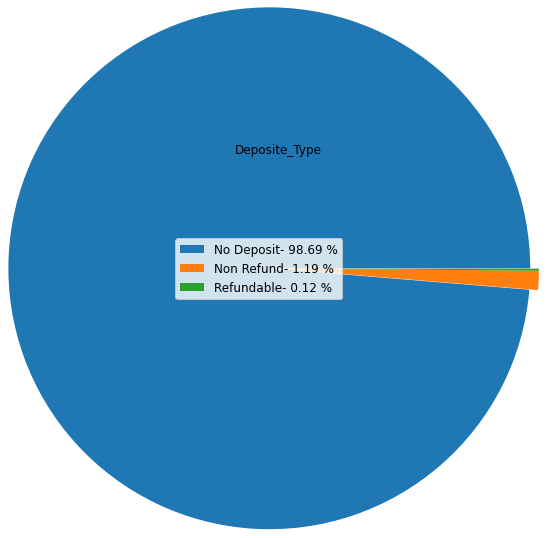

In [ ]:

def make_pieplot(data,explode=[0,0,0,0,0,0]):
  req_data=dict(data.value_counts())
  marketing_options_names=np.array(list(req_data.keys()))
  marketing_options_values=np.array(list(req_data.values()))
  #print(marketing_options_values)
  percent=((marketing_options_values)/marketing_options_values.sum())*100.
  patches,texts=plt.pie(marketing_options_values,rotatelabels=True,radius= 3,explode=explode)
  plt.title("Deposite_Type")
  labels = ['{0}- {1:1.2f} %'.format(i,j) for i,j in zip(marketing_options_names, percent)]
  plt.legend(patches, labels, loc='center left',  fontsize=12)
make_pieplot(hotels["deposit_type"],[0.1,0,0])

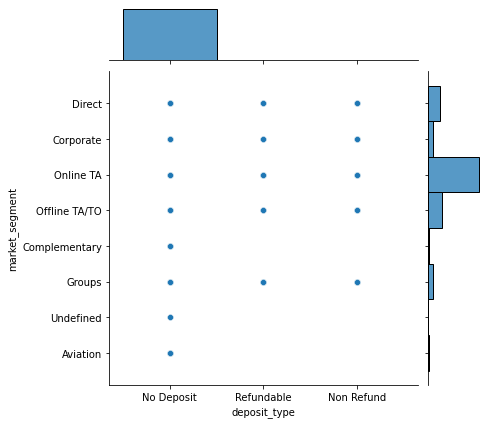

In [ ]:
sns.jointplot(y="market_segment",x="deposit_type",data=hotels)

In [ ]:
agents=hotels["agent"].value_counts()
top_agents=agents.iloc[0:10].index
agents_notreq=agents[agents<=3].index    #we do not require agents who are  not very active
agents_notreq
top_agents.shape

(10,)

In [ ]:
#reserved room : to check which room is demanded most
demanded_room=hotels["reserved_room_type"].value_counts()
demanded_room

A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

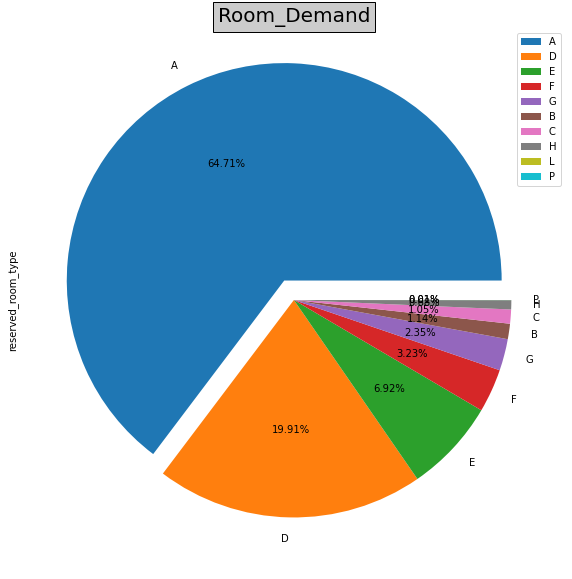

In [ ]:
def make_pieplot(data,explode_):
  #explode_ = [0.05,0,0,0,0,0,0,0]
  dict_data=data.value_counts()
  dict_data.plot(kind = 'pie', y = list(dict(dict_data).keys()), autopct='%1.2f%%', figsize =(15,10),explode = explode_, fontsize = 10,legend=True,rot=45)
  #plt.legend(title ='market_segment',loc ='lower right')
  plt.title('Room_Demand',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
make_pieplot(hotels["reserved_room_type"],[0.1,0,0,0,0,0,0,0,0,0])

In [ ]:
#in which month the tickets are cancelled the most: this is to make sure whether hotel can take an extra entry or not.
canceled_month=pd.crosstab(hotels["arrival_date_month"],hotels["is_canceled"])
canceled_month=pd.DataFrame(canceled_month,index= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )
canceled_month

is_canceled,0,1
January,3655,1038
February,4683,1415
March,5683,1830
April,5499,2409
May,5913,2442
June,5411,2354
July,6859,3198
August,7634,3623
September,5048,1642
October,5292,1642


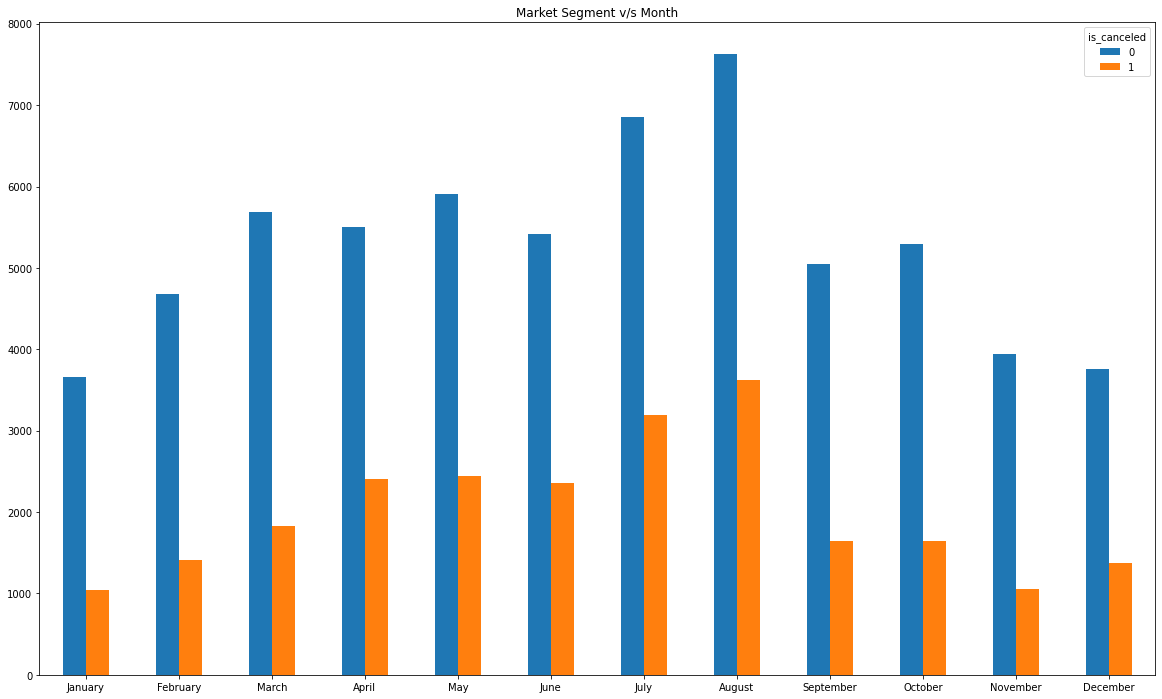

In [ ]:
canceled_month.plot(kind="bar", figsize=(20,12),title="Market Segment v/s Month", rot=0)